In [214]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 2

In [215]:
def experiment():
    n = 20
    d = 3
    A = np.random.randn(n, d)
    A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
    b = 1 + np.random.random(n)
    vertices = []
    mapVtoC = []
    mapCtoV = [[] for i in range(n)]

    for c1 in range(n):
        for c2 in range(c1):
            for c3 in range(c2):
                # this for loop makes sure c1, c2, c3 are not the same
                A_3 = np.array([A[c1], A[c2], A[c3]])
                b_3 = np.array([b[c1], b[c2], b[c3]])
                x = inv(A_3) @ b_3

                # flag to determine if the pair is actually a vertex of the P
                flag = True
                for ci in range(n):
                    # to avoid numerical errors
                    if A[ci] @ x - 1e-8 >= b[ci]:
                        flag = False
                        break
                if flag:
                    vertices.append(x)
                    mapVtoC.append([c1, c2, c3])
                    mapCtoV[c1].append(len(vertices)-1)
                    mapCtoV[c2].append(len(vertices)-1)
                    mapCtoV[c3].append(len(vertices)-1)
    vertices = np.array(vertices)
    
    edges = []
    for i in range(len(vertices)):
        for j in range(i):
            ci, cj = mapVtoC[i], mapVtoC[j]

            # flag to determine if the pair is an edge of the P
            flag = False

            # make sure they satisfies two of the constraints
            for c1 in range(3):
                for c2 in range(c1):
                    if ci[c1] in cj and ci[c2] in cj:
                        flag = True
            if flag:
                edges.append(np.array([vertices[i], vertices[j]]))
    faces = []
    for face in mapCtoV:
        if len(face) >= 3:
            faces.append(vertices[face])
    
    return vertices, edges, faces

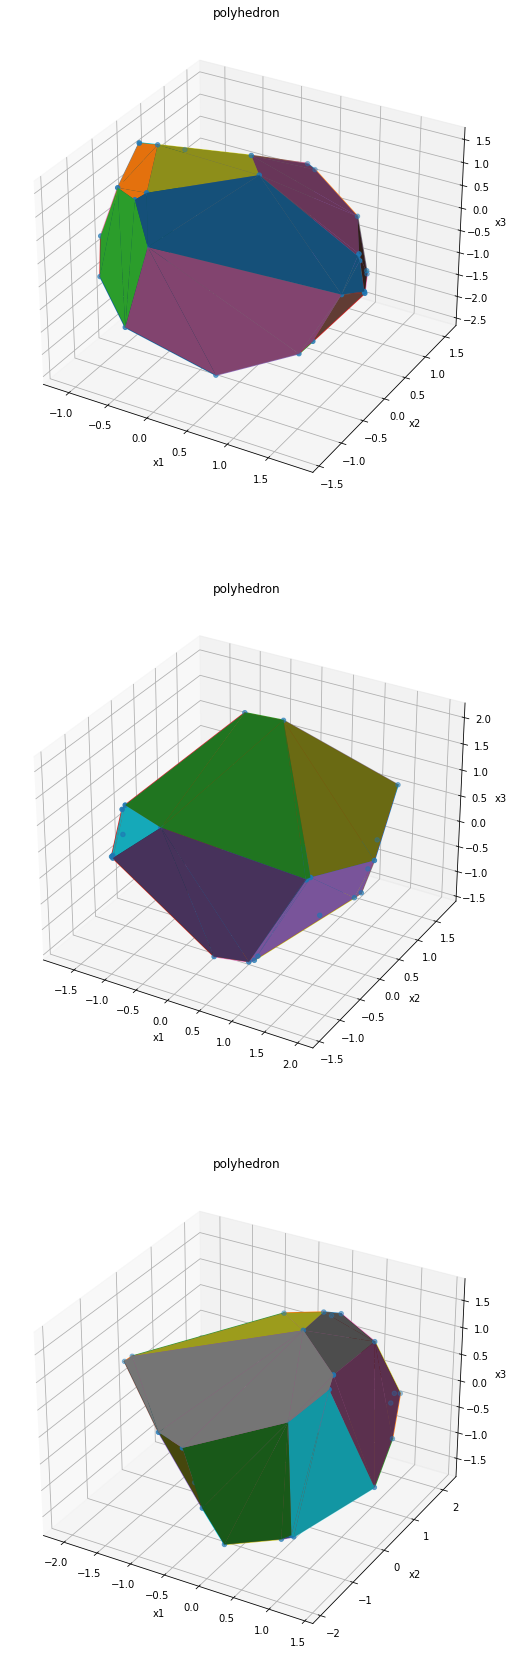

In [216]:
fig = plt.figure(figsize = (10,30))
for i in range(1,4):
    vertices, edges, faces = experiment()
    ax = fig.add_subplot(3,1,i, projection='3d')
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=20)
    for edge in edges:
        ax.plot(edge[:, 0], edge[:, 1], edge[:, 2])
    for face in faces:
        ax.plot_trisurf(face[:, 0], face[:, 1], face[:, 2])
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_title('polyhedron')
plt.show()

## Question 3

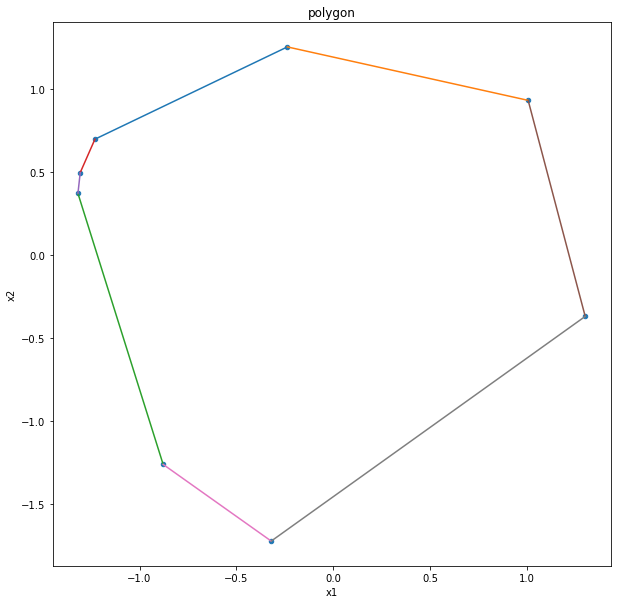

In [221]:
n = 20
d = 2
A = np.random.randn(n, d)
A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
b = 1 + np.random.random(n)

vertices = []
mapVtoC = []

for c1 in range(n):
    for c2 in range(c1):
        A_2 = np.array([A[c1], A[c2]])
        b_2 = np.array([b[c1], b[c2]])
        x = inv(A_2) @ b_2

        # flag to determine if the pair is actually a vertex of the P
        flag = True
        for ci in range(n):
            # to avoid numerical errors
            if A[ci] @ x - 1e-8 >= b[ci]:
                flag = False
                break
        if flag:
            vertices.append(x)
            mapVtoC.append([c1, c2])
vertices = np.array(vertices)

edges = []
for i in range(len(vertices)):
    for j in range(i):
        ci, cj = mapVtoC[i], mapVtoC[j]

        # flag to determine if the pair is an edge of the P
        flag = False

        # make sure they satisfies two of the constraints
        for c1 in range(2):
            if ci[c1] in cj:
                flag = True
        if flag:
            edges.append(np.array([vertices[i], vertices[j]]))

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(vertices[:, 0], vertices[:, 1], s=20)
for edge in edges:
    ax.plot(edge[:, 0], edge[:, 1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('polygon')
plt.show()

In [222]:
# set up cost function and plot the level set and minimizer

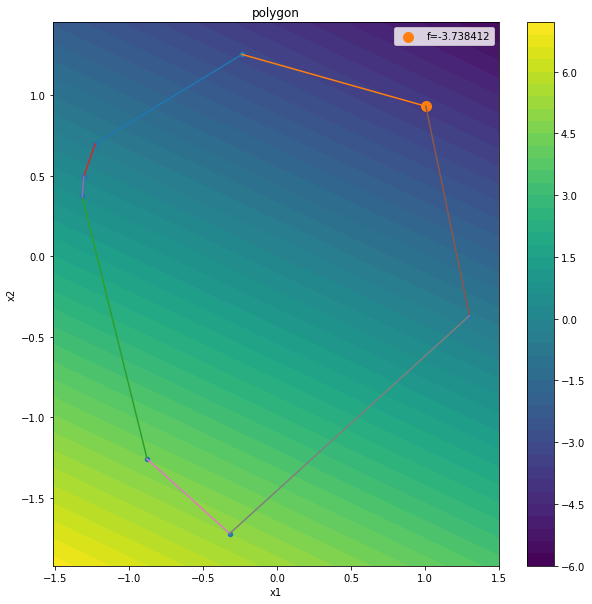

In [223]:
c = np.random.randn(2)
minf = None 
minx = []

# check vertex should be enough
for x in vertices:
    if minf is None or x @ c < minf:
        minf = x @ c
        minx = x
x1, x2 = np.meshgrid(np.linspace(np.min(vertices[:, 0]) - 0.2, np.max(vertices[:, 0]) + 0.2, 100), np.linspace(np.min(vertices[:, 1]) - 0.2, np.max(vertices[:, 1]) + 0.2, 100))
f = c[0] * x1 + c[1] * x2

fig = plt.figure(figsize = (10,10))
fig.colorbar(plt.contourf(x1, x2, f, levels = 50))
plt.scatter(vertices[:, 0], vertices[:, 1], s=20)
for edge in edges:
    plt.plot(edge[:, 0], edge[:, 1])
plt.scatter(minx[0], minx[1], s = 100, label='f={0:.6f}'.format(minf))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('polygon')
plt.legend()
plt.show()
